# PCA

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk("C://Users//TmC//Downloads//Wine.csv"):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [6]:
df = pd.read_csv("C://Users//TmC//Downloads//Wine.csv")
df

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  Customer_Segment  
0     3.92     1065                 1  
1     3.40     1050                 1  
2     3.17     1185                 1  
3     3.45     1480                 1  
4     2.93      735                 1  
..     ...      ...               ...  
173   1.74      740                 3  
174   1.56      750                 3  
175   1.56      835                 3  
176   1.62      840                 3  
177   1.60      560                 3  

[178 rows x 14 columns]

In [7]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [8]:
from sklearn.model_selection import train_test_split
X=df.drop("Customer_Segment",axis=1).values
y=df["Customer_Segment"].values

In [9]:
X_train, X_test, y_train,y_test =train_test_split(X,y, test_size=0.2,random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
from sklearn.decomposition import PCA
pca= PCA(n_components=2)# we make an instance of PCA and decide how many components we want to have
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [12]:
print(X_train.shape) # As we can see, we have reduced feature into 2 main features
print(X_test.shape)

(142, 2)
(36, 2)


C:\Users\TmC\AppData\Local\Temp\ipykernel_10952\1398737753.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train[:,0],X_train[:,1],cmap="plasma")


Text(0, 0.5, 'The Second Principal Component')

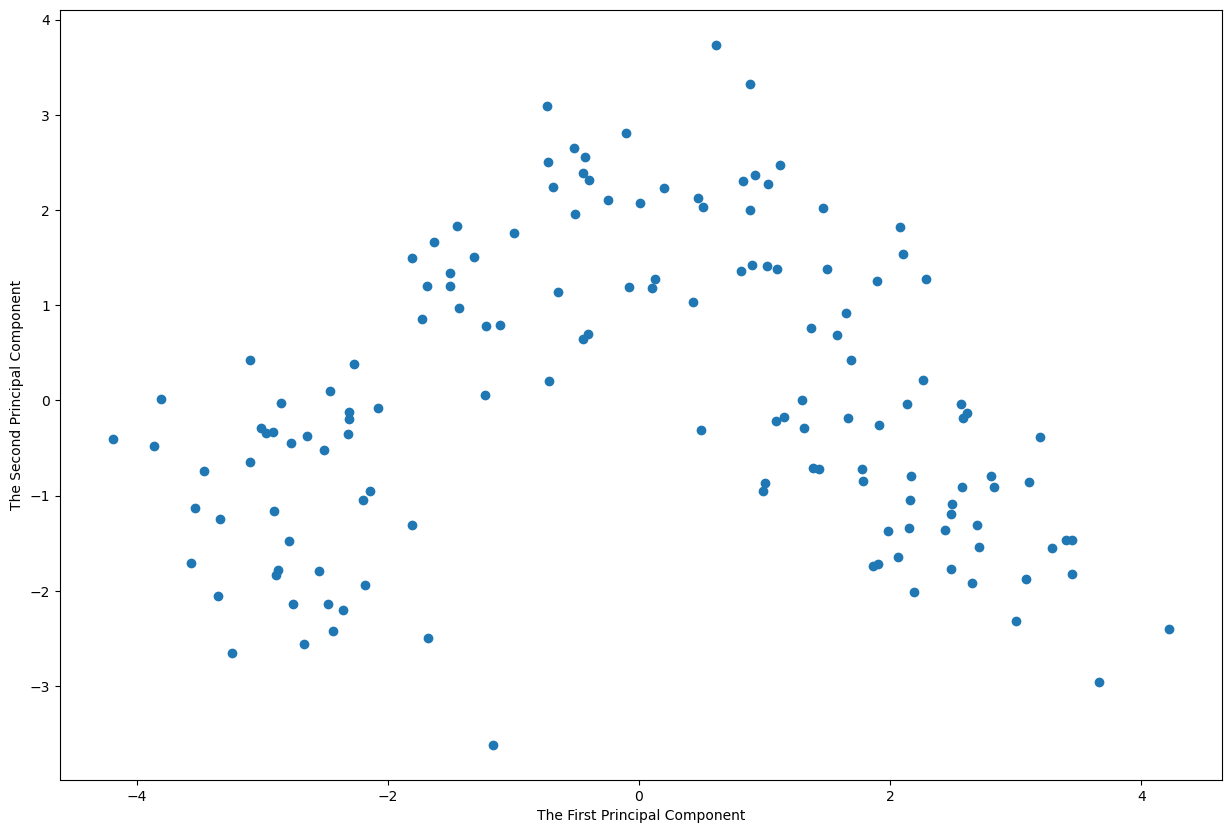

In [13]:
plt.figure(figsize=(15,10))
plt.scatter(X_train[:,0],X_train[:,1],cmap="plasma")
plt.xlabel("The First Principal Component")
plt.ylabel("The Second Principal Component")
#Here we plot all the rows of columns 1 and column 2 in a scatterplot

In [14]:
pca.components_

array([[ 0.12753249, -0.25623655, -0.02236181, -0.24428137,  0.14757757,
         0.38490786,  0.41950095, -0.2992598 ,  0.30843734, -0.11907301,
         0.29949964,  0.38381622,  0.27587548],
       [-0.4928047 , -0.1904464 , -0.31676447,  0.03513857, -0.26217161,
        -0.09601687, -0.01513129, -0.07626286, -0.0738558 , -0.53396728,
         0.28133315,  0.14274046, -0.381054  ]])

In [15]:
df_comp=pd.DataFrame(pca.components_)
df_comp

0         1         2         3         4         5         6   \
0  0.127532 -0.256237 -0.022362 -0.244281  0.147578  0.384908  0.419501   
1 -0.492805 -0.190446 -0.316764  0.035139 -0.262172 -0.096017 -0.015131   

         7         8         9         10        11        12  
0 -0.299260  0.308437 -0.119073  0.299500  0.383816  0.275875  
1 -0.076263 -0.073856 -0.533967  0.281333  0.142740 -0.381054

<Axes: >

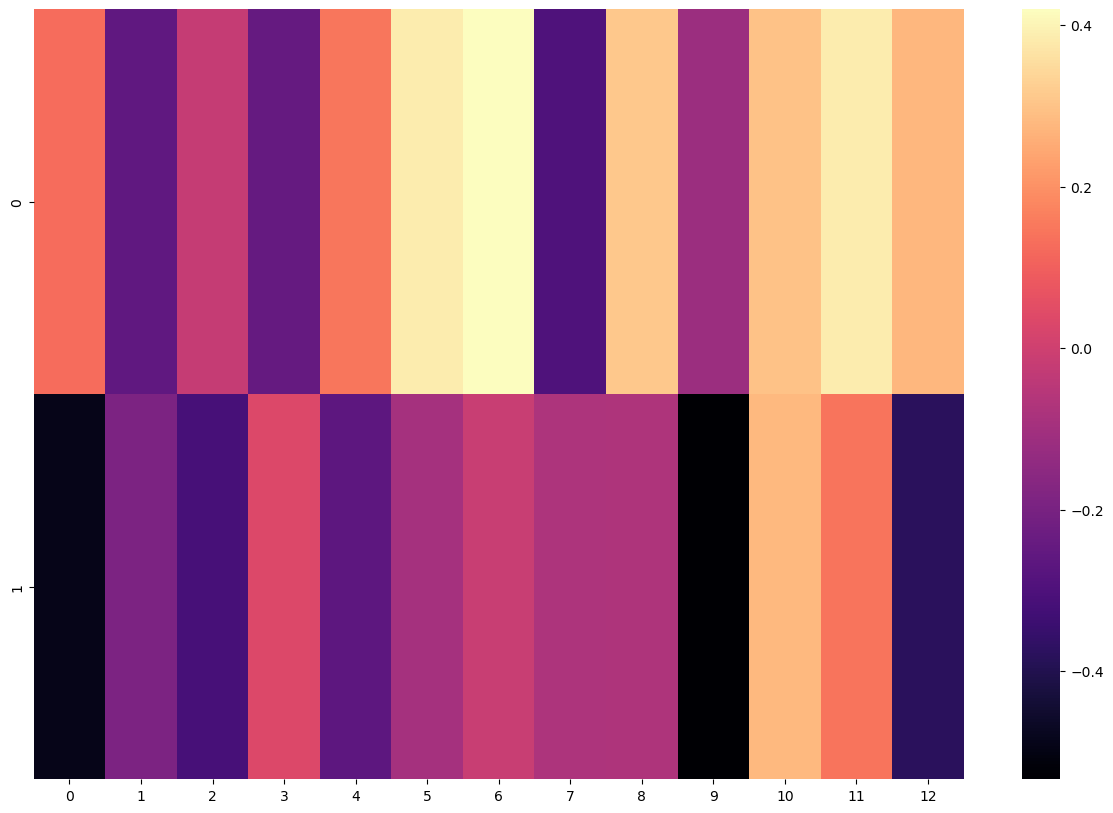

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(df_comp,cmap="magma")

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
#We have %100 procent accuracy although we have just used the main components of the data

1.0
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



C:\Users\TmC\AppData\Local\Temp\ipykernel_10952\1998405769.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


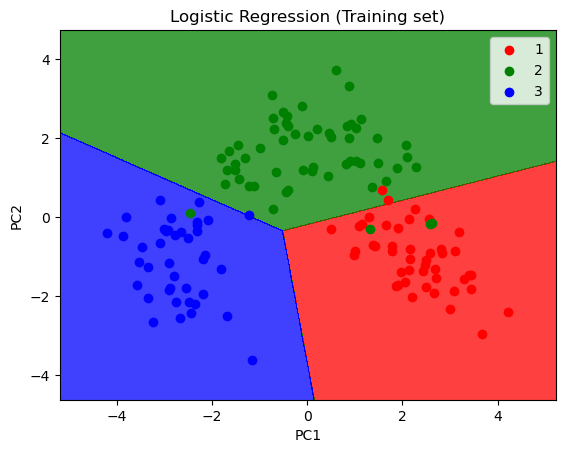

In [19]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()
#This is performance of the algorithm with training set

C:\Users\TmC\AppData\Local\Temp\ipykernel_10952\2361039638.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


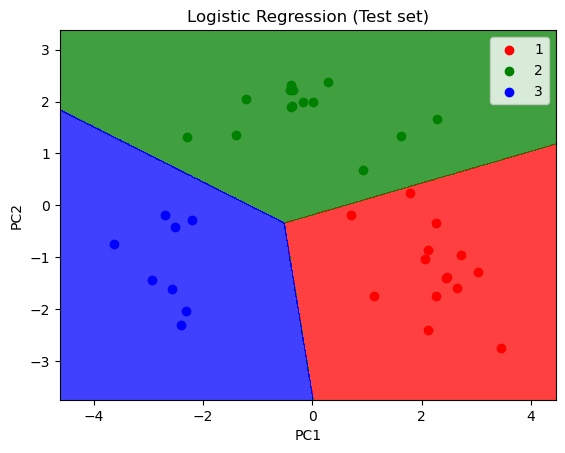

In [21]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()
#This is visualization of performance of the algorithm with test set

# LDA

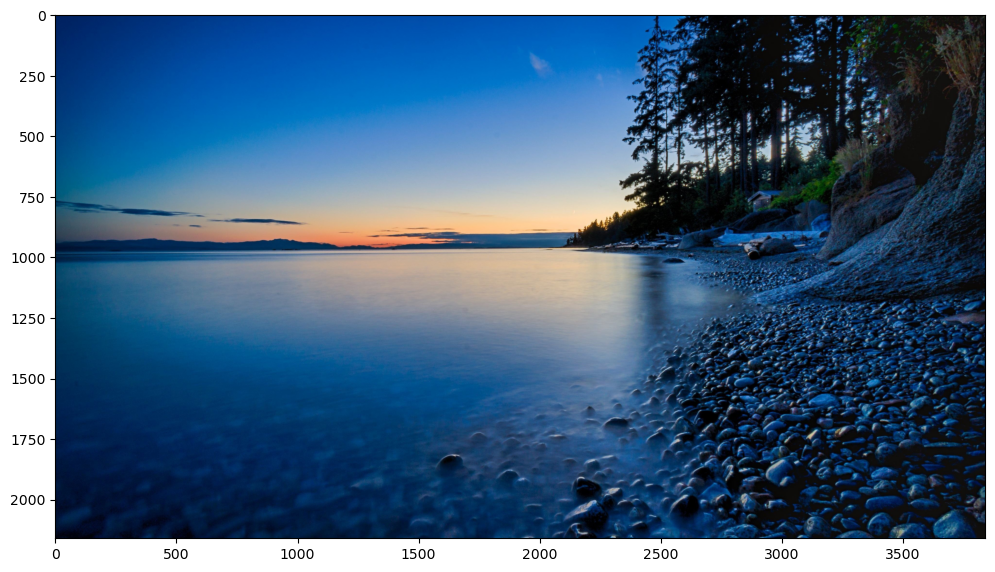

In [23]:
plt.figure(figsize=(12,10))
plt.imshow(plt.imread("C://Users//TmC//Pictures//Saved Pictures//4k-wallpapers-26.jpg"))

In [24]:
X_train, X_test, y_train,y_test =train_test_split(X,y, test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)

(142, 13)
(36, 13)


In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda =LDA(n_components=2) # we select the same number of components
X_train = lda.fit_transform(X_train,y_train) # we have to write both X_train and y_train
X_test = lda.transform(X_test)

In [26]:
print(X_train.shape)
print(X_test.shape)

(142, 2)
(36, 2)


In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

1.0
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



C:\Users\TmC\AppData\Local\Temp\ipykernel_10952\2954202663.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


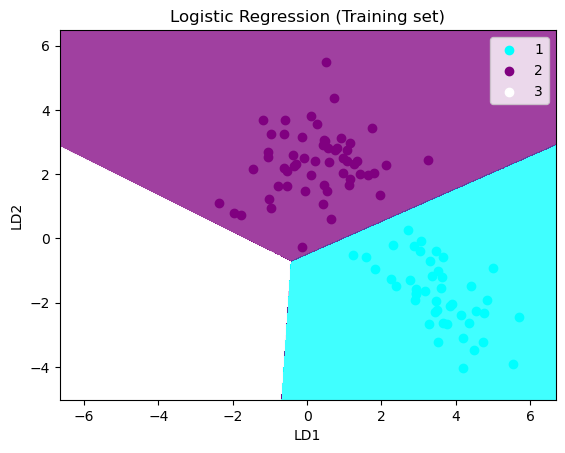

In [29]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('cyan', 'purple', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('cyan', 'purple', 'white'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

C:\Users\TmC\AppData\Local\Temp\ipykernel_10952\2815607706.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


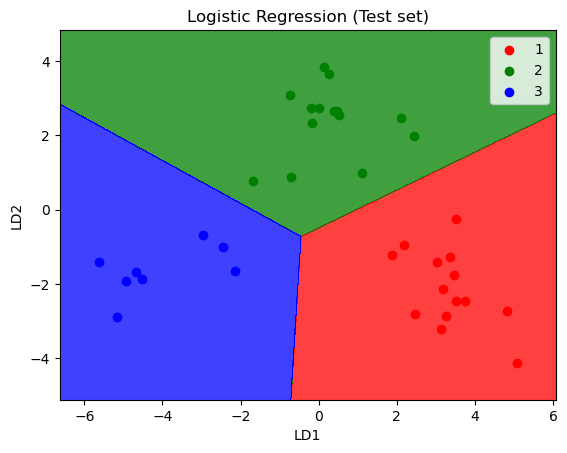

In [30]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

# Data imbalance check

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from collections import Counter

In [34]:
try:
    raw_df = pd.read_csv("C://Users//TmC//Downloads//heart.csv")
except:
    raw_df = pd.read_csv('heart.csv')

In [35]:
raw_df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [50]:
import pandas as pd
import plotly.express as px

# Load the heart disease dataset
df = pd.read_csv("C://Users//TmC//Downloads//heart.csv")

# Check for data imbalance
labels = ["Healthy", "Heart Disease"]
values = df['target'].value_counts().tolist()

# Create a pie chart to visualize the data imbalance
fig = px.pie(values=values, names=labels, width=700, height=400, color_discrete_sequence=["skyblue", "black"],
             title="Healthy vs Heart Disease")
fig.show()


In [56]:
#Creating dummies
df = pd.get_dummies(df, drop_first=True)

In [60]:
#Train test split
X = df.drop('target', axis=1)
y = df['target']
# List the columns in your DataFrame
column_names = df.columns
print(column_names)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

# Feature scaling

In [62]:
from sklearn.preprocessing import StandardScaler

# Creating function for scaling
def Standard_Scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    
    return df

In [70]:
from sklearn.preprocessing import StandardScaler

def Standard_Scaler(df, col_names):
    scaler = StandardScaler()
    df[col_names] = scaler.fit_transform(df[col_names])
    return df

# Apply StandardScaler to your data
X_train = Standard_Scaler(X_train, ['chol'])
X_test = Standard_Scaler(X_test, ['oldpeak'])

# List the column names in your DataFrame
column_names = df.columns
print(column_names)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [71]:
#Model building
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

#We are going to ensure that we have the same splits of the data every time. 
#We can ensure this by creating a KFold object, kf, and passing cv=kf instead of the more common cv=5.

kf = KFold(n_splits=5, shuffle=False)

In [72]:
rf = RandomForestClassifier(n_estimators=50, random_state=13)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=13)

In [73]:
y_pred = rf.predict(X_test)

In [74]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
cm = confusion_matrix(y_test, y_pred)

rf_Recall = recall_score(y_test, y_pred)
rf_Precision = precision_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[141   9]
 [  7 151]]


# K-Fold Cross-validation

In [75]:
from statistics import stdev
score = cross_val_score(rf, X_train, y_train, cv=kf, scoring='recall')
rf_cv_score = score.mean()
rf_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', rf_cv_score)
print('Cross Validation Recall standard deviation: ', rf_cv_stdev)

Cross Validation Recall scores are: [0.93023256 1.         0.9625     0.9375     0.98666667]
Average Cross Validation Recall score:  0.9633798449612403
Cross Validation Recall standard deviation:  0.030218350989991066


In [76]:
ndf = [(rf_Recall, rf_Precision, rf_f1, rf_accuracy, rf_cv_score, rf_cv_stdev)]

rf_score = pd.DataFrame(data = ndf, columns=
                        ['Recall','Precision','F1 Score', 'Accuracy', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
rf_score.insert(0, 'Random Forest', 'Before tuning hyperparameters')
rf_score

Random Forest    Recall  Precision  F1 Score  Accuracy  \
0  Before tuning hyperparameters  0.955696    0.94375  0.949686  0.948052   

   Avg CV Recall  Standard Deviation of CV Recall  
0        0.96338                         0.030218

# LOOCV

In [26]:
# loocv to automatically evaluate the performance of a random forest classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_blobs
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
# create dataset
x, y = make_blobs(n_samples=100, random_state=0)
# split dataset to training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
# create loocv procedure
cv = LeaveOneOut()
# create model
model = RandomForestClassifier(random_state=1)
# evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print(f"Accuracy: {mean(scores):.3f} ({std(scores):.3f})")

Accuracy: 0.943 (0.232)


In [ ]:
Grid Search

In [29]:
iris_ds= pd.read_csv("C://Users//TmC//Downloads//Iris.csv")
iris_ds.columns,iris_ds.shape
#print(iris_ds.shape)

(Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
        'Species'],
       dtype='object'),
 (150, 6))

In [30]:
iris_ds.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [31]:
iris_ds.tail()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica

In [32]:
iris_ds.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [33]:
iris_ds.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [35]:
iris_ds.columns.values

array(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
       'PetalWidthCm', 'Species'], dtype=object)

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'SepalLengthCm'}>],
       [<Axes: title={'center': 'SepalWidthCm'}>,
        <Axes: title={'center': 'PetalLengthCm'}>],
       [<Axes: title={'center': 'PetalWidthCm'}>, <Axes: >]], dtype=object)

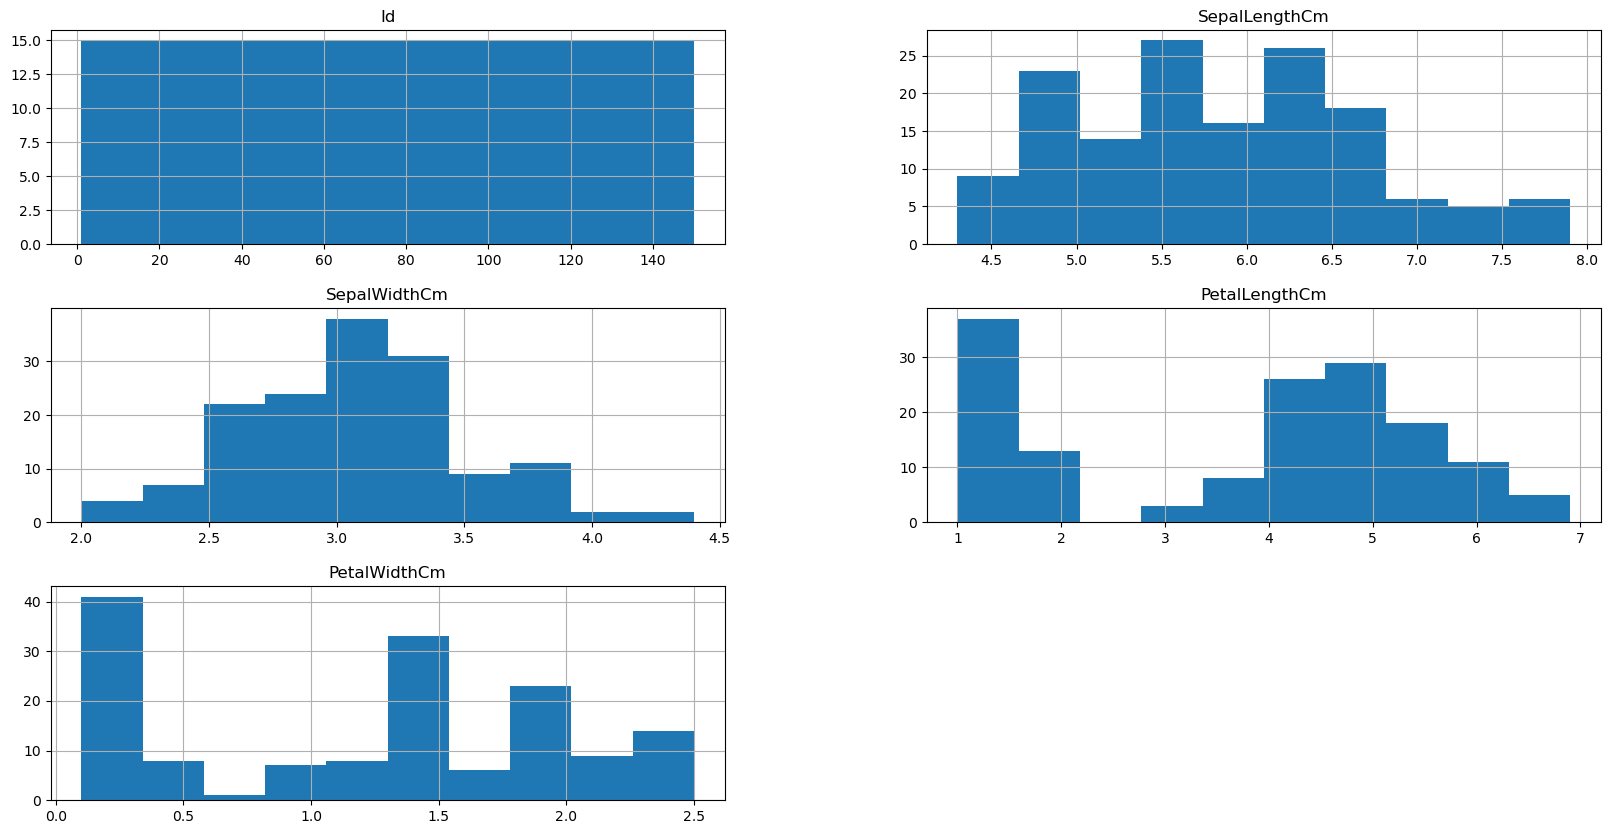

In [36]:
iris_ds.hist(figsize=(20,10))

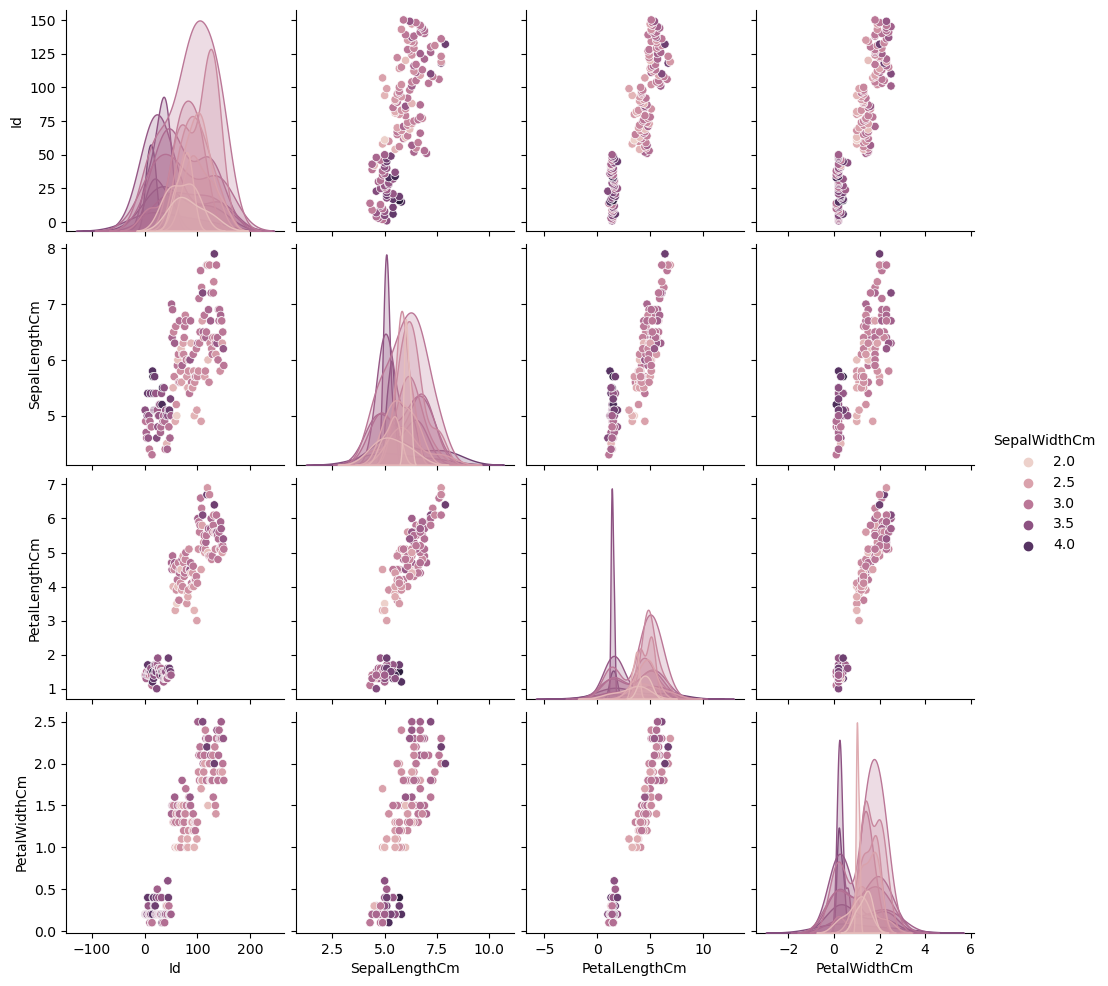

In [38]:
sns.pairplot(iris_ds,hue='SepalWidthCm')

<Axes: >

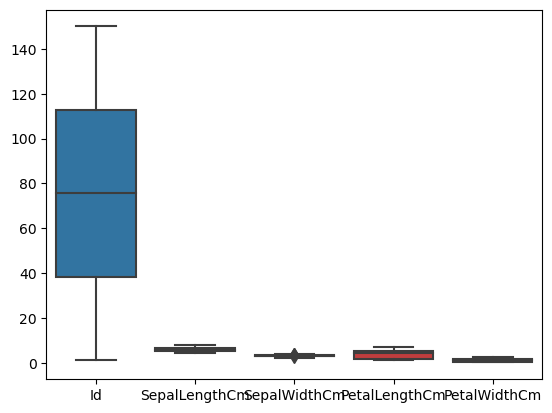

In [39]:
sns.boxplot(data=iris_ds)

In [40]:
iris_ds.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [41]:
iris_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [44]:
iris_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [48]:
iris_ds.columns.values

array(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
       'PetalWidthCm', 'Species'], dtype=object)

In [52]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [53]:
x_train

array([[ 0.12378826, -0.54093251],
       [-0.48352835,  1.52027542],
       [ 0.60179348,  0.02330715],
       [ 0.67252221, -1.126568  ],
       [ 0.48695035, -0.7288036 ],
       [ 0.18406464, -0.58490511],
       [-1.23808798,  1.23166637],
       [ 1.52534119, -1.27796751],
       [-1.10366153,  0.54016871],
       [ 0.35798044,  0.06229766],
       [-0.27905259,  1.26979988],
       [-1.93885473,  0.30419074],
       [ 1.0214653 , -0.31200308],
       [ 1.08103686, -1.60173949],
       [-0.36665386,  0.11106096],
       [ 1.9194843 , -0.58155881],
       [-0.23194611, -0.08533993],
       [-0.55433821, -0.55959987],
       [ 1.05472825, -0.70947555],
       [ 0.03427676,  1.1219509 ],
       [ 1.0774118 , -1.86354228],
       [ 1.92840643, -2.0268743 ],
       [ 1.18074819, -1.29616309],
       [-1.45970908,  0.14414581],
       [-1.41029627, -0.02057188],
       [ 0.03883976,  0.99002322],
       [ 0.93737838,  1.79274784],
       [ 0.16467911,  0.73861104],
       [-0.27465737,

In [54]:
#Following algorithems I used for predict

#LogisticRegression
#SVM
#KNN
#DecisionTree
#ReandomForest
#GradientBoosting

def normal_prediction():
    logis = LogisticRegression()
    logis.fit(x_train,y_train)
    print("logistic regression::\n",confusion_matrix(y_test,logis.predict(x_test)),"\n")
    
    svm = SVC()
    svm.fit(x_train,y_train)
    print("SVM ::\n",confusion_matrix(y_test,logis.predict(x_test)),"\n")
    
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)
    print("KNN ::\n",confusion_matrix(y_test,knn.predict(x_test)),"\n")
    
    dTmodel = DecisionTreeClassifier()
    dTmodel.fit(x_train,y_train)
    print("DecisionTree ::\n",confusion_matrix(y_test,dTmodel.predict(x_test)),"\n")
    
    rForest = RandomForestClassifier()
    rForest.fit(x_train,y_train)
    print("RandomForest ::\n",confusion_matrix(y_test,rForest.predict(x_test)),"\n")

    grBoosting = GradientBoostingClassifier()
    grBoosting.fit(x_train,y_train)
    print("GradientBoosting ::\n",confusion_matrix(y_test,grBoosting.predict(x_test)),"\n")

In [55]:
normal_prediction()

logistic regression::
 [[ 8  2  0]
 [ 0  7  0]
 [ 1  0 12]] 

SVM ::
 [[ 8  2  0]
 [ 0  7  0]
 [ 1  0 12]] 

KNN ::
 [[ 8  2  0]
 [ 0  7  0]
 [ 2  0 11]] 

DecisionTree ::
 [[ 8  1  1]
 [ 0  7  0]
 [ 1  0 12]] 

RandomForest ::
 [[ 8  2  0]
 [ 0  7  0]
 [ 0  0 13]] 

GradientBoosting ::
 [[ 8  1  1]
 [ 0  7  0]
 [ 1  0 12]] 



In [56]:
#Using Cross_val_score() function to predict output. This way we can use KFold cross validation.
#using cross_val_score
logis = LogisticRegression()
svm = SVC()
knn = KNeighborsClassifier()
dTmodel = DecisionTreeClassifier()
rForest = RandomForestClassifier()
grBoosting = GradientBoostingClassifier()
    
scores = cross_val_score(logis,x_train,y_train,cv=5)
print("Accuracy for logistic regresion: mean: {0:.2f} 2sd: {1:.2f}".format(scores.mean(),scores.std() * 2))
print("Scores::",scores)
print("\n")

scores2 = cross_val_score(svm,x_train,y_train,cv=5)
print("Accuracy for SVM: mean: {0:.2f} 2sd: {1:.2f}".format(scores2.mean(),scores2.std() * 2))
print("Scores::",scores)
print("\n")

scores3 = cross_val_score(knn,x_train,y_train,cv=5)
print("Accuracy for KNN: mean: {0:.2f} 2sd: {1:.2f}".format(scores3.mean(),scores3.std() * 2))
print("Scores::",scores)
print("\n")

scores4 = cross_val_score(dTmodel,x_train,y_train,cv=5)
print("Accuracy for Decision Tree: mean: {0:.2f} 2sd: {1:.2f}".format(scores4.mean(),scores4.std() * 2))
print("Scores::",scores4)
print("\n")

scores5 = cross_val_score(rForest,x_train,y_train,cv=5)
print("Accuracy for Random Forest: mean: {0:.2f} 2sd: {1:.2f}".format(scores5.mean(),scores5.std() * 2))
print("Scores::",scores5)
print("\n")

scores6 = cross_val_score(grBoosting,x_train,y_train,cv=5)
print("Accuracy for Gradient Boosting: mean: {0:.2f} 2sd: {1:.2f}".format(scores6.mean(),scores6.std() * 2))
print("Scores::",scores6)
print("\n")

Accuracy for logistic regresion: mean: 0.90 2sd: 0.17
Scores:: [0.85714286 0.78571429 1.         0.85714286 1.        ]


Accuracy for SVM: mean: 0.89 2sd: 0.19
Scores:: [0.85714286 0.78571429 1.         0.85714286 1.        ]


Accuracy for KNN: mean: 0.91 2sd: 0.11
Scores:: [0.85714286 0.78571429 1.         0.85714286 1.        ]


Accuracy for Decision Tree: mean: 0.93 2sd: 0.13
Scores:: [0.85714286 0.85714286 1.         1.         0.92857143]


Accuracy for Random Forest: mean: 0.94 2sd: 0.11
Scores:: [0.92857143 0.85714286 1.         0.92857143 1.        ]


Accuracy for Gradient Boosting: mean: 0.93 2sd: 0.13
Scores:: [0.85714286 0.85714286 1.         1.         0.92857143]




In [57]:
#GridSearchCV and RandomizedSearchCV are ways to tune hyper parameters
clf = RandomForestClassifier()
#Random Forest
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 4),
              "min_samples_split": sp_randint(2, 4),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 5
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

random_search.fit(x_train, y_train)
print(random_search.best_params_)
print(random_search.best_estimator_)
confusion_matrix(y_test,random_search.predict(x_test))

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 3, 'min_samples_split': 2}
RandomForestClassifier(criterion='entropy', max_depth=3, max_features=3)


array([[ 7,  2,  1],
       [ 0,  7,  0],
       [ 1,  0, 12]], dtype=int64)

In [58]:
#Using GridSearchCV to tune parameters
# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 4],
              "min_samples_split": [2, 3, 4],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_estimator_)
confusion_matrix(y_test,grid_search.predict(x_test))

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 1, 'min_samples_split': 4}
RandomForestClassifier(max_depth=3, max_features=1, min_samples_split=4)


array([[ 8,  1,  1],
       [ 0,  7,  0],
       [ 1,  0, 12]], dtype=int64)